In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
df.shape

(9994, 21)

In [18]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Convert dates to datetime for analysis

In [ ]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [19]:
boughts = df.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
boughts

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Storex Dura Pro Binders,71
Avery Non-Stick Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


# 1. Total Sales and Profit by Category

In [4]:

category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum()
print("Total Sales and Profit by Category:\n", category_sales_profit)

Total Sales and Profit by Category:
                        Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


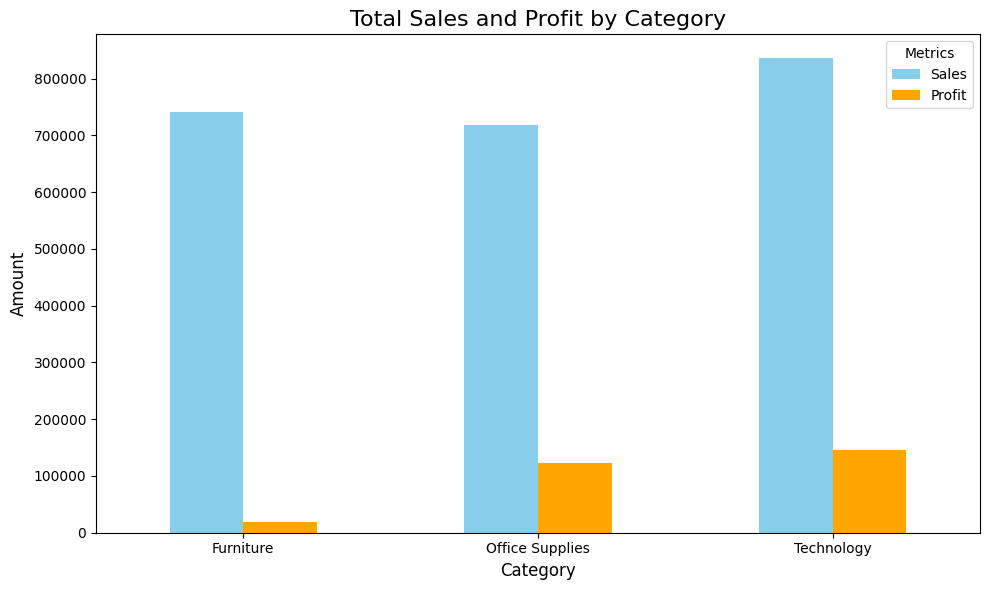

In [19]:

category_sales_profit.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Total Sales and Profit by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


# 2. Highest and Lowest Profit Sub-Category

In [ ]:
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum()
highest_profit_subcat = sub_category_profit.idxmax()
lowest_profit_subcat = sub_category_profit.idxmin()
print(f"Highest Profit Sub-Category: {highest_profit_subcat}")
print(f"Lowest Profit Sub-Category: {lowest_profit_subcat}")

Highest Profit Sub-Category: Copiers
Lowest Profit Sub-Category: Tables


C:\Users\DELL\AppData\Local\Temp\ipykernel_9116\596337309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_profit.values, y=sub_category_profit.index, palette="coolwarm")


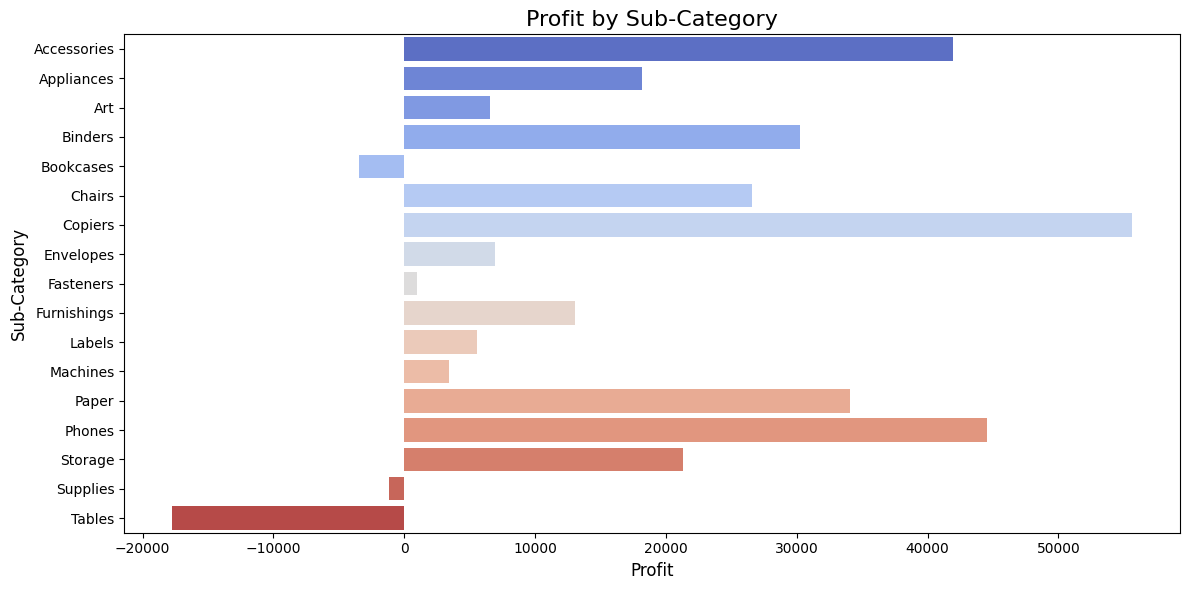

In [20]:

plt.figure(figsize=(12, 6))
sns.barplot(x=sub_category_profit.values, y=sub_category_profit.index, palette="coolwarm")
plt.title("Profit by Sub-Category", fontsize=16)
plt.xlabel("Profit", fontsize=12)
plt.ylabel("Sub-Category", fontsize=12)
plt.tight_layout()
plt.show()


# 3. Trend of Sales and Profit Over Time

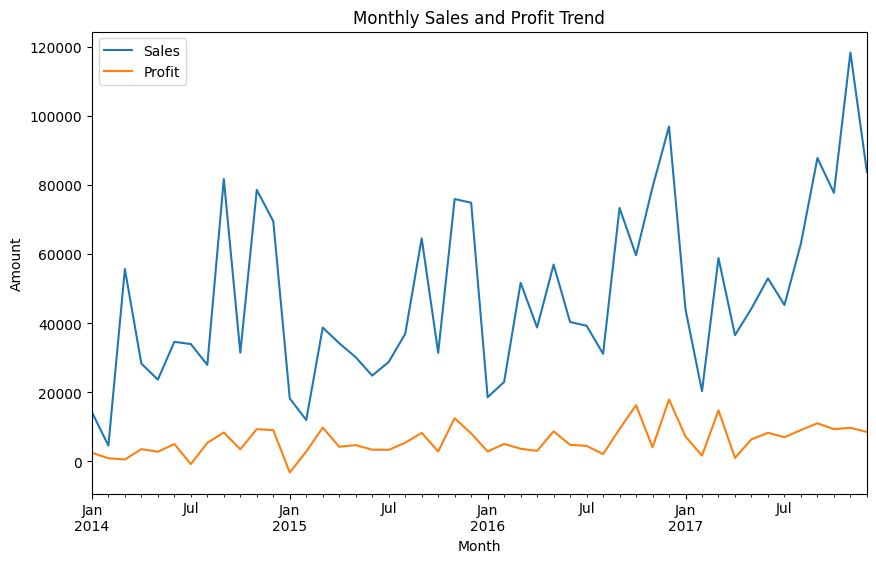

In [9]:
monthly_trend = df.groupby(df['Order Date'].dt.to_period('M'))[['Sales', 'Profit']].sum()
monthly_trend.plot(kind='line', figsize=(10, 6))
plt.title("Monthly Sales and Profit Trend")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.show()

# 4. Top 10 Customers by Revenue

In [8]:

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:\n", top_customers)

Top 10 Customers by Revenue:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_9116\189417205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='mako')


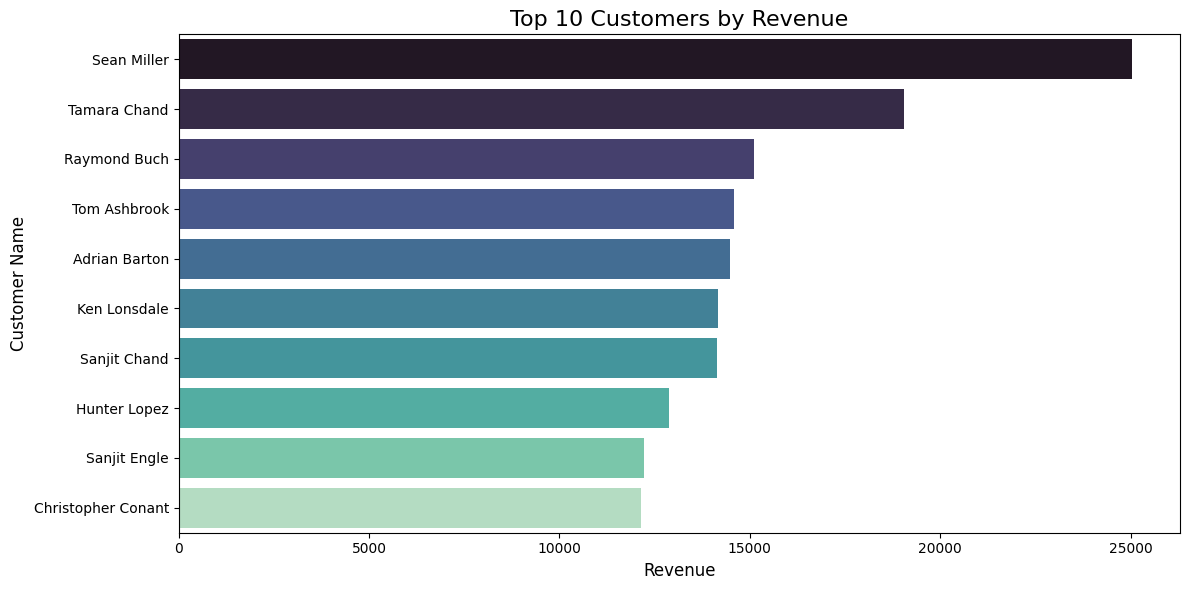

In [21]:

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='mako')
plt.title("Top 10 Customers by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Customer Name", fontsize=12)
plt.tight_layout()
plt.show()


# 5. Regional Contribution to Sales and Profit

In [10]:
regional_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum()
print("Regional Contribution to Sales and Profit:\n", regional_sales_profit)

Regional Contribution to Sales and Profit:
                Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489


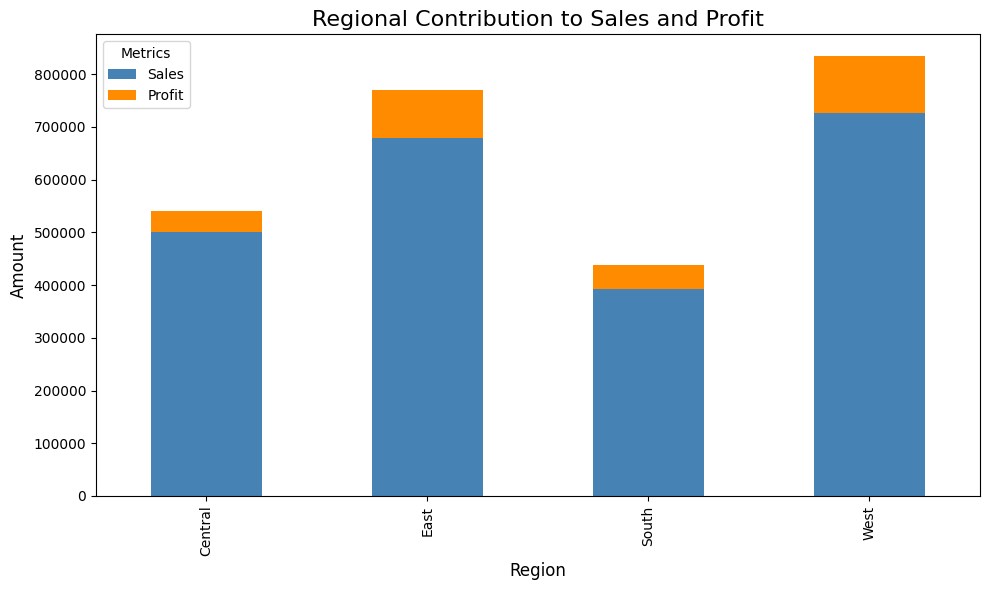

In [22]:

regional_sales_profit.plot(kind='bar', figsize=(10, 6), stacked=True, color=['steelblue', 'darkorange'])
plt.title("Regional Contribution to Sales and Profit", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


# 6. Segment-wise Profit

In [11]:

segment_profit = df.groupby('Segment')['Profit'].sum()
print("Segment-wise Profit:\n", segment_profit)

Segment-wise Profit:
 Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

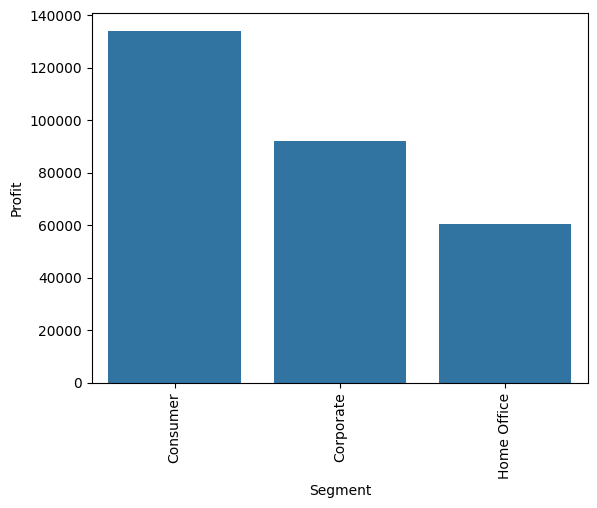

In [17]:
sns.barplot(x='Segment',y='Profit',data=segment_profit.reset_index())
plt.xticks(rotation = 'vertical')

# 7. Average Delivery Time for Each Ship Mode

In [12]:

df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delivery_time = df.groupby('Ship Mode')['Delivery Time'].mean()
print("Average Delivery Time by Ship Mode:\n", avg_delivery_time)

Average Delivery Time by Ship Mode:
 Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: Delivery Time, dtype: float64


# 8. Correlation Between Discount and Profit

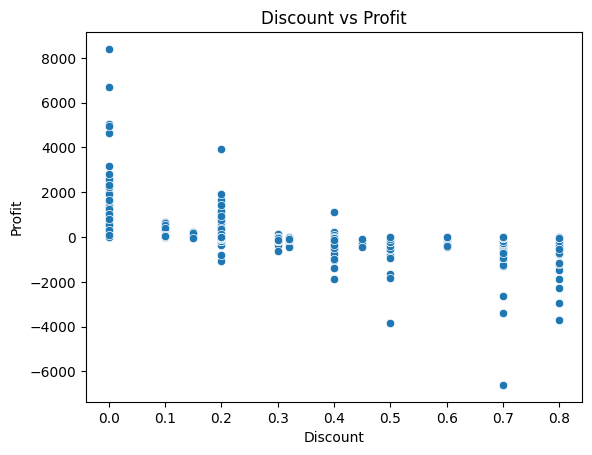

In [13]:

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()

# 9. Top Cities by Sales and Profit

In [14]:

top_cities = df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(5)
print("Top 5 Cities by Sales and Profit:\n", top_cities)

Top 5 Cities by Sales and Profit:
                     Sales      Profit
City                                 
New York City  256368.161  62036.9837
Los Angeles    175851.341  30440.7579
Seattle        119540.742  29156.0967
San Francisco  112669.092  17507.3854
Philadelphia   109077.013 -13837.7674


# 10. Revenue Contribution of Each Category Over Time

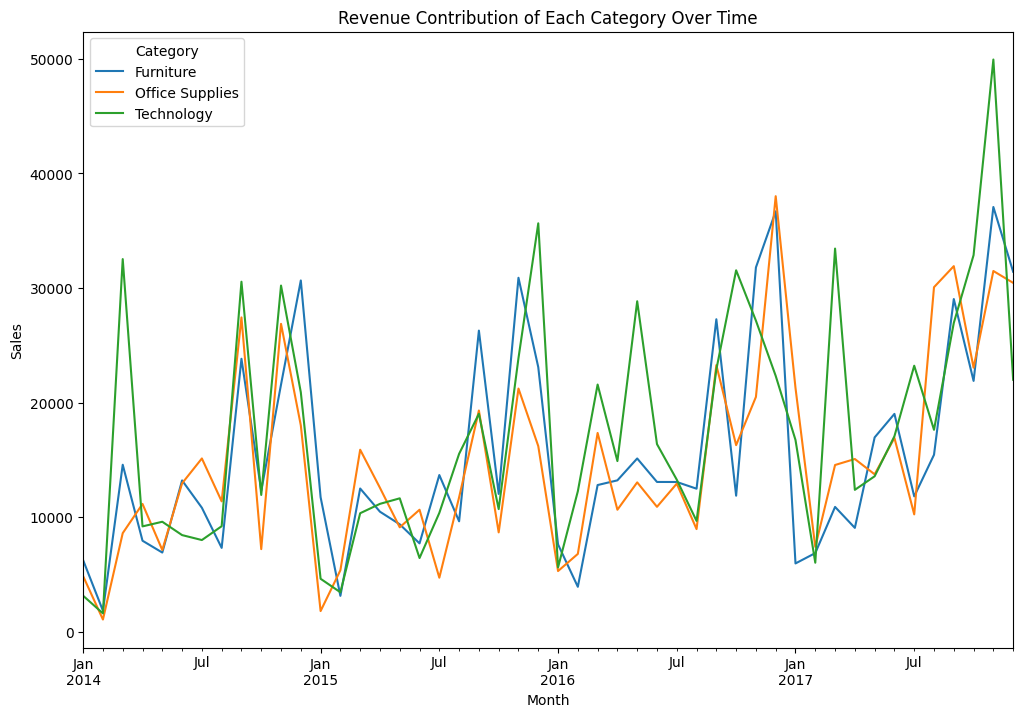

In [15]:

category_monthly = df.groupby([df['Order Date'].dt.to_period('M'), 'Category'])['Sales'].sum().unstack()
category_monthly.plot(kind='line', figsize=(12, 8))
plt.title("Revenue Contribution of Each Category Over Time")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

# 11. Which products were purchased most frequently?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Staple envelope'),
  Text(2, 0, 'Easy-staple paper'),
  Text(3, 0, 'Staples in misc. colors'),
  Text(4, 0, 'KI Adjustable-Height Table'),
  Text(5, 0, 'Storex Dura Pro Binders'),
  Text(6, 0, 'Avery Non-Stick Binders'),
  Text(7, 0, 'GBC Premium Transparent Covers with Diagonal Lined Pattern'),
  Text(8, 0, 'Situations Contoured Folding Chairs, 4/Set'),
  Text(9, 0, 'Staple-based wall hangings')])

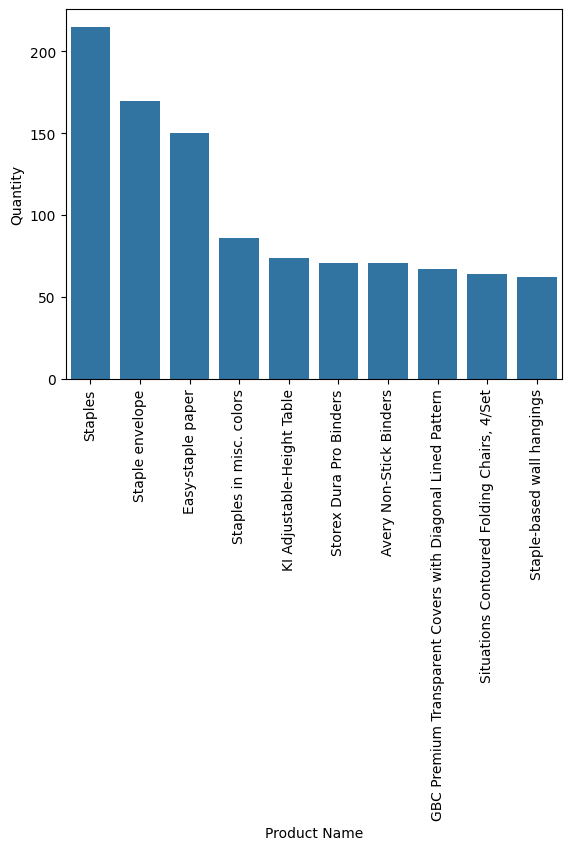

In [22]:
sns.barplot(x='Product Name',y='Quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

# 12. What are the top 10 products by sales revenue?

In [23]:
productSales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])
productSales.sort_values(by=['Sales'], inplace=True, ascending=False)
productSales.head(10)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


# 13. What are the top 10 products by profit?

In [24]:
profitable_products = pd.DataFrame(df.groupby(['Product Name']).sum()['Profit'])
profitable_products.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_products.head(10)

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
  Text(2, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(3, 0, 'Canon PC1060 Personal Laser Copier'),
  Text(4, 0, 'HP Designjet T520 Inkjet Large Format Printer - 24" Color'),
  Text(5, 0, 'Ativa V4110MDD Micro-Cut Shredder'),
  Text(6, 0, '3D Systems Cube Printer, 2nd Generation, Magenta'),
  Text(7, 0, 'Plantronics Savi W720 Multi-Device Wireless Headset System'),
  Text(8, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(9, 0, 'Zebra ZM400 Thermal Label Printer')])

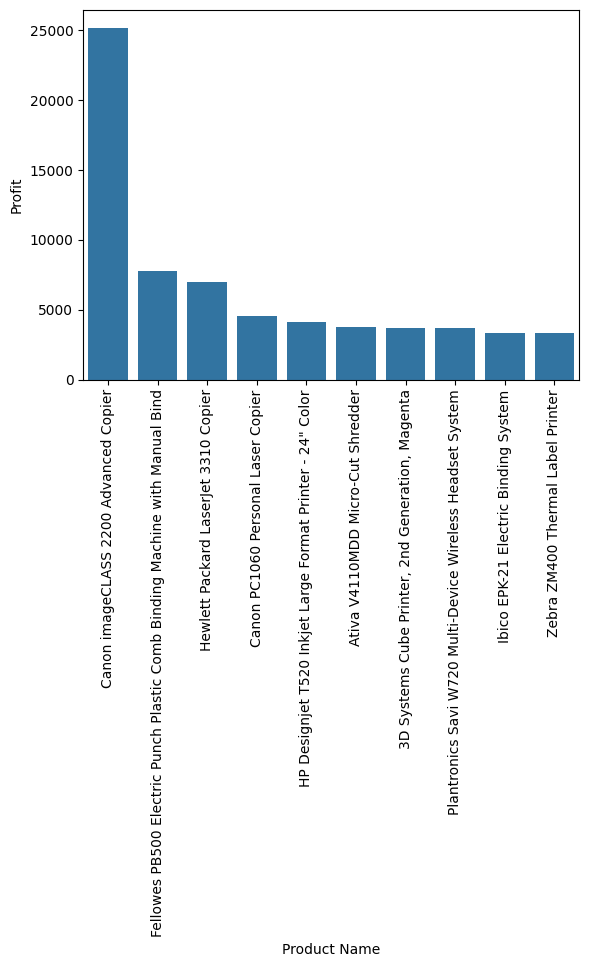

In [25]:
sns.barplot(x='Product Name',y='Profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

# 14. The average quantity sold for each sub-category

C:\Users\DELL\AppData\Local\Temp\ipykernel_9116\726882665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_quantity_per_subcategory.index, y=avg_quantity_per_subcategory.values, palette='viridis')


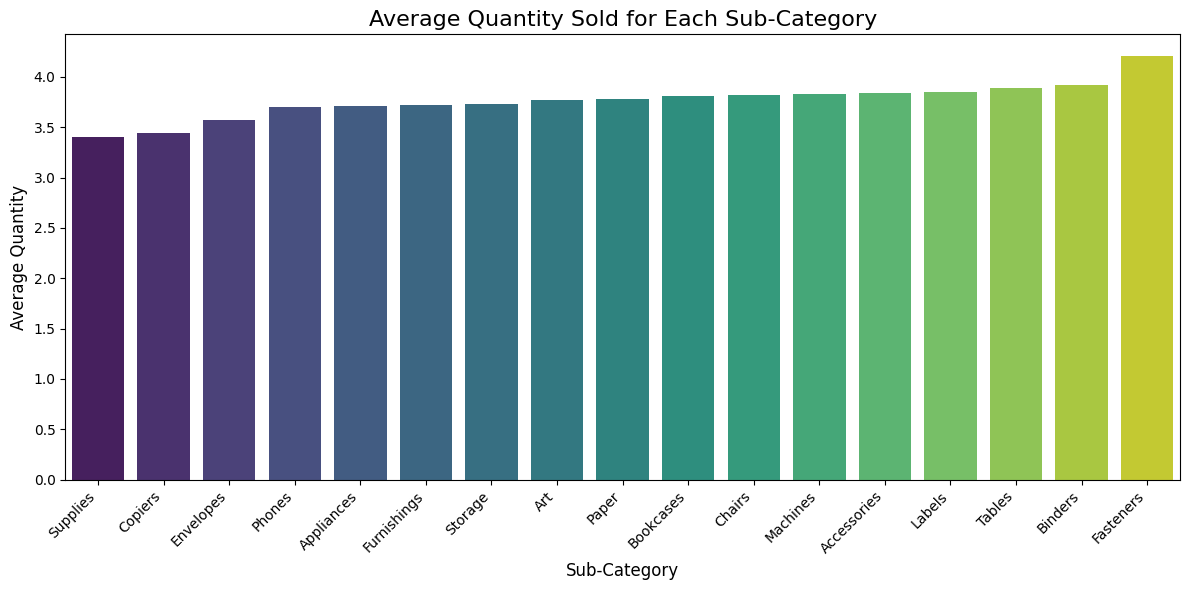

In [ ]:
avg_quantity_per_subcategory = df.groupby('Sub-Category')['Quantity'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_quantity_per_subcategory.index, y=avg_quantity_per_subcategory.values, palette='viridis')
plt.title("Average Quantity Sold for Each Sub-Category", fontsize=16)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Average Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
